What is the most optimal skill to learn for Data Analysts?

Methodology



1.   Continue from last notebook to find percent of postings with skill
2.   Visualize median salary vs percent skill demand




In [2]:
#Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("/content/data_jobs.csv")
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Clean Data
Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'United States', to create a new DataFrame df_DA_US. Drop NaN values from the 'salary_year_avg' column. Then it uses the explode method on the job_skills column to create a new row in a new DataFrame (df_DA_US_exploded) for each skill associated with a job. Finally, it displays the first 5 entries of the salary_year_avg and job_skills columns.

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


Calculate Percent of Job Postings that Have Skills

In [16]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,89,100700.0,60.958904
excel,65,86400.0,44.520548
python,51,103000.0,34.931507
tableau,37,90500.0,25.342466
sas,32,93775.0,21.917808
...,...,...,...
jupyter,1,120000.0,0.684932
nosql,1,65000.0,0.684932
perl,1,186500.0,0.684932


Median Salary vs Percent Skill Demand


In [7]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

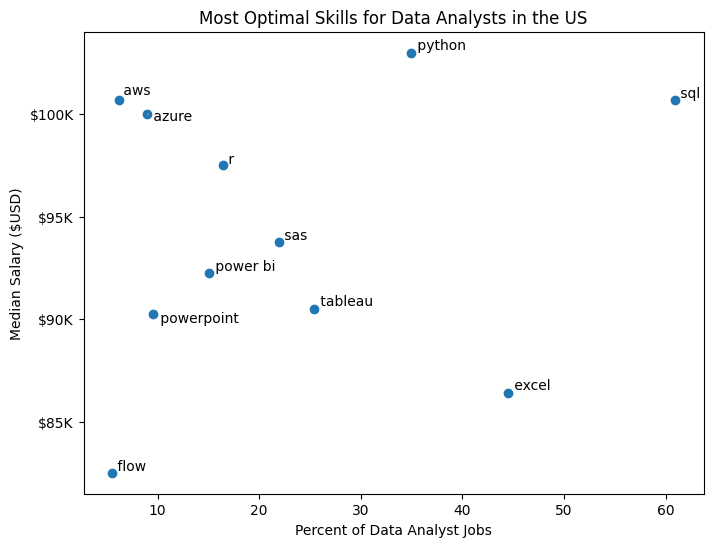

In [21]:

filtered_df = df_DA_skills_high_demand[df_DA_skills_high_demand['median_salary'] <= 108000]

# Create figure
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(filtered_df['skill_percent'], filtered_df['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Formatting salary in K

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(filtered_df.index):
    texts.append(plt.text(filtered_df['skill_percent'].iloc[i],
                          filtered_df['median_salary'].iloc[i],
                          " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Show the plot
plt.show()